In [3]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Generate the data
X, y = datasets.make_regression(n_samples=100, n_features=5, noise=20, random_state=4)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [5]:
print(X.shape)
print(y.shape)

(100, 5)
(100,)


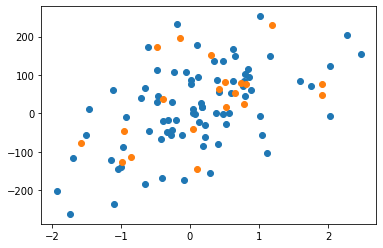

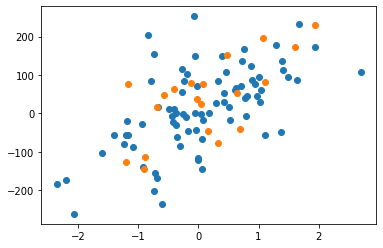

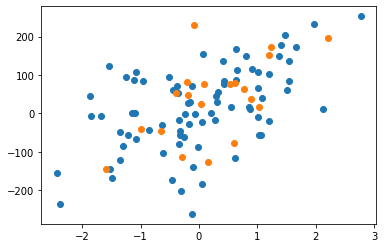

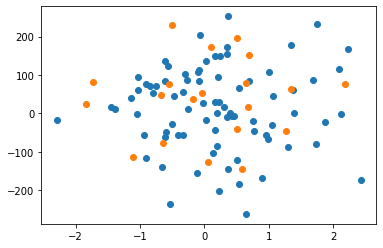

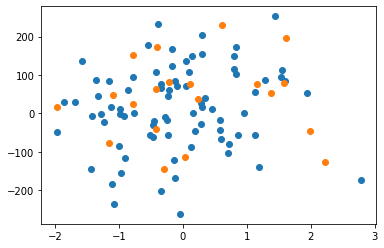

In [6]:
for i in range(5):
  plt.scatter(X_train[:,i],y_train)
  plt.scatter(X_test[:,i],y_test)
  plt.show()

In [20]:
import numpy as np

class LinearRegression:

        # Hint: Google what a `self pointer` is and figure out how it can be used here.
    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.l_rate = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None


    # The following function would be the heart of the model. This is where the training would happen. 
    # You're supposed to iterate and keep on updating the weights and biases according to the steps of Gradient Descent.
    def fit(self, X, y):
        # Gradient Descent code goes here
        ns, nf = X.shape

        self.weights = np.zeros(nf)
        self.bias = 0
        for _ in range(self.n_iters):
            y_pred=np.dot(X,self.weights) + self.bias
            dw = (1/ns)*np.dot(X.T,(y_pred-y))
            db = (1/ns)*np.sum(y_pred - y)

            self.weights = self.weights - self.l_rate*dw
            self.bias = self.bias-self.l_rate*db
        
    # This function will be called after our model has been trained and we are predicting on unseen data
    # What is our prediction? Just return that
    def predict(self, X):
        # Code goes here
        y_calc = np.dot(X,self.weights) + self.bias
        return y_calc


In [21]:
regressor = LinearRegression(learning_rate=0.01, n_iters=1000)
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)

In [22]:
def mean_squared_error(y_true, y_pred):
       # return the mean squared error
       return np.mean((y_true-y_pred)**2)


def r2_score(y_true, y_pred):
      # return the r2 score
      corr_matrix = np.corrcoef(y_true, y_pred)
      corr = corr_matrix[0, 1]
      return corr**2
          

mse = mean_squared_error(y_test, predictions) # Pass appropriate parts of dataset
print("MSE:", mse)

accu = r2_score(y_test, predictions) # Pass appropriate parts of dataset
print("Accuracy:", accu)

MSE: 390.6026570894989
Accuracy: 0.9637788781894968


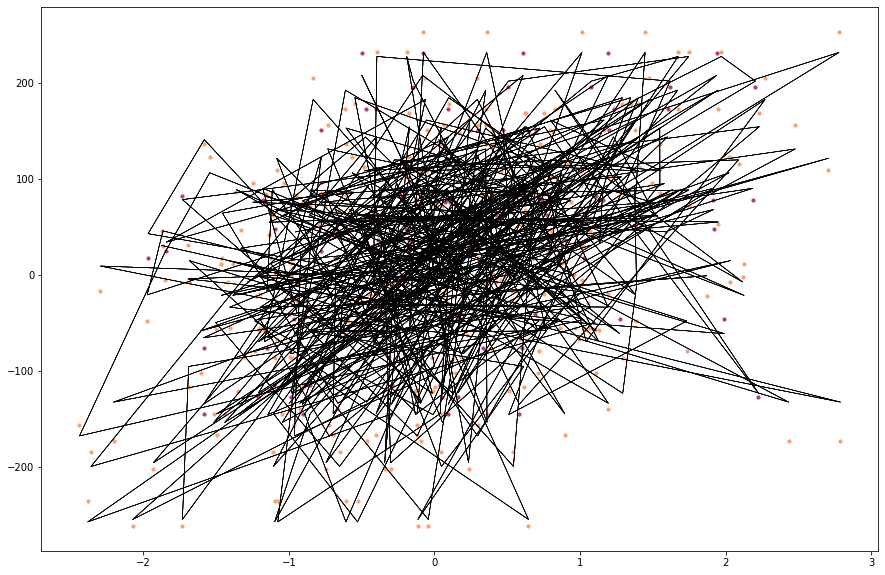

In [19]:
y_pred_line = regressor.predict(X)
cmap = plt.get_cmap("magma")
fig = plt.figure(figsize=(15, 10))
for i in range(5):
  m1 = plt.scatter(X_train[:,i], y_train, color=cmap(0.8), s=10)
  m2 = plt.scatter(X_test[:,i], y_test, color=cmap(0.5), s=10)
  plt.plot(X, y_pred_line, color="black", linewidth=0.5, label="Prediction")
plt.show()

Taken reference from : https://github.com/python-engineer/MLfromscratch